## Load Dependencies

In [1]:
from data import *
import data as db
import pandas as pd
import warnings
from importlib import reload

In [2]:
reload( db )
hdr = '\r\n' + '-' * 120 + '\r\n'
nwln = '\r\n'
warnings.filterwarnings( 'ignore' )

In [3]:
# Load Data
file_path_balances = r'C:\Users\terry\source\repos\Mathy\db\Account Balances.xlsx'
df_balances = pd.read_excel( file_path_balances, sheet_name='Data' )
numeric_columns = [ 'CarryoverAuthority', 'CarryoverAdjustments', 'AnnualAppropriations',
                    'BorrowingAuthority', 'ContractAuthority', 'OffsettingReceipts',
                    'Obligations', 'Recoveries', 'UnobligatedBalance', 'Outlays', 'TotalResources' ]
column_subset = [ 'AnnualAppropriations', 'CarryoverAuthority', 'UnobligatedBalance',
                  'Obligations', 'Outlays' ]

# Filter Data
all = [ 'AccountBalancesId', 'AgencyIdentifier', 'AgencyName', 'BeginningPeriodOfAvailability',
        'EndingPeriodOfAvailability', 'Availability', 'MainAccountCode', 'SubAccountCode',
        'TreasuryAccountSymbol', 'TreasuryAccountName', 'BudgetFunction', 'BudgetSubFunction',
        'FederalAccountSymbol', 'FederalAccountName', 'LastModified',
        'SubmissionPeriod' ] + numeric_columns
subset = [ 'AgencyName', 'BudgetFunction' ] + column_subset

cols_to_drop = [
		'AccountBalancesId', 'TreasuryAccountName', 'TreasuryAccountSymbol', 'LastModified',
		'SubmissionPeriod', 'Availability', 'LastModified', 'SubmissionPeriod', 'SubAccountCode',
		'BudgetSubFunction', 'FederalAccountSymbol', 'FederalAccountName', ]

# Define complete dataset
df_dataset = df_balances[ all ].fillna( 0 )
df_subset = df_balances[ subset ].fillna( 0 )

# Clean and preprocess
df_dataset.drop( columns=cols_to_drop, inplace=True, errors='ignore' )
df_data = df_dataset.copy( )

print( hdr )
print( 'Balances Dataset' )
print( nwln )

# Descriptive Statistics & Probability Distributions
df_descriptive = df_balances[ numeric_columns ].describe( percentiles=[ .05, .1, .25, .5, .75, .9, .95, ] )

df_data


------------------------------------------------------------------------------------------------------------------------

Balances Dataset




,AgencyIdentifier,AgencyName,BeginningPeriodOfAvailability,EndingPeriodOfAvailability,MainAccountCode,BudgetFunction,CarryoverAuthority,CarryoverAdjustments,AnnualAppropriations,BorrowingAuthority,ContractAuthority,OffsettingReceipts,Obligations,Recoveries,UnobligatedBalance,Outlays,TotalResources
0,435,OFFICE OF NAVAJO AND HOPI INDIAN RELOCATION,0.0,0.0,1100,GENERAL GOVERNMENT,9375126.93,391778.13,0.000000e+00,0,0,0.00,5.395160e+06,391778.13,4.371745e+06,4.907144e+06,9.766905e+06
1,306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,0.0,0.0,8298,NATURAL RESOURCES AND ENVIRONMENT,10000.00,0.00,2.040750e+04,0,0,0.00,7.594410e+03,0.00,2.281309e+04,7.594410e+03,3.040750e+04
2,306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,2024.0,2025.0,2300,NATURAL RESOURCES AND ENVIRONMENT,0.00,0.00,0.000000e+00,0,0,3335315.06,1.023794e+06,0.00,2.311521e+06,9.386225e+05,3.335315e+06
3,306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,2024.0,2024.0,2300,NATURAL RESOURCES AND ENVIRONMENT,0.00,0.00,8.585000e+06,0,0,98377.54,8.671171e+06,0.00,1.220688e+04,7.798614e+06,8.683378e+06
4,306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,2023.0,2024.0,2300,NATURAL RESOURCES AND ENVIRONMENT,1473398.99,643.36,0.000000e+00,0,0,-205636.56,1.268380e+06,643.36,2.559000e+01,1.265628e+06,1.268406e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56982,12,DEPARTMENT OF AGRICULTURE,2018.0,2019.0,3539,INCOME SECURITY,0.00,0.00,2.422415e+10,0,0,0.00,2.206119e+10,0.00,2.162957e+09,1.820965e+10,2.422415e+10
56983,11,DEPARTMENT OF STATE,2014.0,2015.0,1075,INTERNATIONAL AFFAIRS,20369364.56,4999963.09,0.000000e+00,0,0,0.00,3.365290e+05,6320448.09,2.503280e+07,1.466619e+07,2.536933e+07
56984,91,DEPARTMENT OF EDUCATION,2017.0,2018.0,203,"EDUCATION, TRAINING, EMPLOYMENT, AND SOCIAL SE...",72769058.38,0.00,0.000000e+00,0,0,0.00,7.276894e+07,0.00,1.148900e+02,1.351539e+07,7.276906e+07
56985,75,DEPARTMENT OF HEALTH AND HUMAN SERVICES,2011.0,2015.0,352,HEALTH,3611656.08,42135.04,0.000000e+00,0,0,0.00,2.956034e+04,42135.04,3.624231e+06,2.634180e+06,3.653791e+06


In [4]:
ds = Dataset( df = df_data, target = 'AgencyName' )

In [6]:
ds.calculate_categorical_statistics()

,AgencyName,BudgetFunction
count,56987,56987
unique,114,19
top,DEPARTMENT OF HEALTH AND HUMAN SERVICES,INTERNATIONAL AFFAIRS
freq,7067,6586


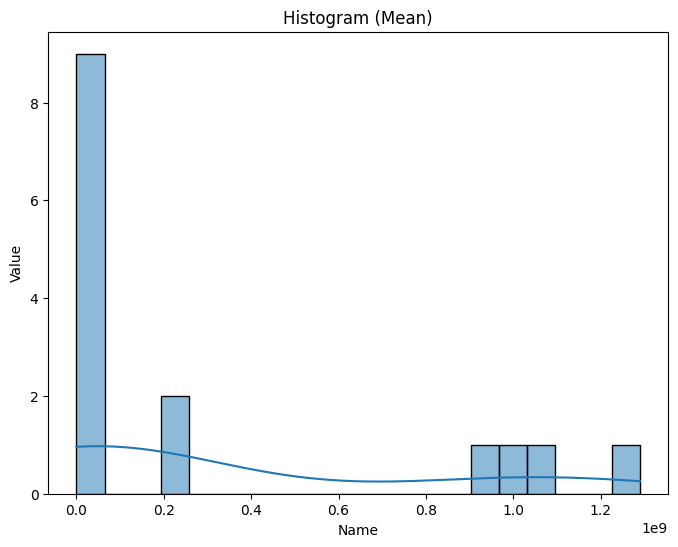

In [7]:
ds.create_histogram( )